In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
'''
Exclusively to Mac OS, these two lines of code below need to be added for some reason
'''
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
tf.set_random_seed(777)
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
nb_classes = 10

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch:    1, Cost: 2.826302764
Epoch:    2, Cost: 1.061668977
Epoch:    3, Cost: 0.838061338
Epoch:    4, Cost: 0.733232755
Epoch:    5, Cost: 0.669279892
Epoch:    6, Cost: 0.624611846
Epoch:    7, Cost: 0.591160359
Epoch:    8, Cost: 0.563868995
Epoch:    9, Cost: 0.541745176
Epoch:   10, Cost: 0.522673587
Epoch:   11, Cost: 0.506782326
Epoch:   12, Cost: 0.492447642
Epoch:   13, Cost: 0.479955843
Epoch:   14, Cost: 0.468893675
Epoch:   15, Cost: 0.458703483
Learning finished.
Accuracy:  0.8951
Label:  [4]
Prediction:  [4]


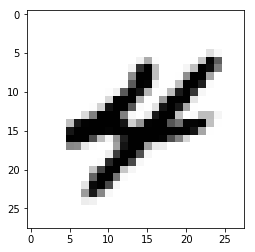

In [3]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')

hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples/batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([optimizer, cost], feed_dict = {X:batch_xs, Y:batch_ys})
            avg_cost += cost_val / num_iterations
        
        print(f'Epoch: {epoch+1:4d}, Cost: {avg_cost:.9f}')
        
    print('Learning finished.')
    
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()